# EDSA 2022 Classification Hackathon

## South African Languages Identification

By **LUNGISA NHLAKANIPHO JOCTREY**

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

Credit:https://www.kaggle.com/competitions/south-african-language-identification/overview

### Table of Contents

1. Introduction
2. Importing Packages and Data Loading
3. Exploratory Data Analysis
4. Data Preprocessing
5. Modelling
6. Model Analysis

### 1. Introduction

The end goal of this project is to develop a model that will be able to take a piece if text and identify the language in which it is written. each prediction a modell will make will the be submitted to Kaggle where it will be evaluated and allocated a score and rank.

I will start off by importing libraries that I can use to colpete the project at hand. Next, I will be loading train_set.csv as df_train and test_set.csv as df_test. After loading the data, I will then display the datasets, to see how they look like. 

Next, I will do the Exploratory Data Analysis (EDA) to gain insight on the data. In this section I will look for missing, values, null values and also see what data types are in the features. with help of graphs and words cloud, I will gain more insight on the data. I will also creat new features if necessary.

Then I will do data preprocessing. Basically, this will be getting the data for the model.

I will then build and train my models.


### 2. Importing Packages and Data Loading

#### 2.1 Importing Packages

The first thing I will do now is to load all the necessary libraries or modules needed for this project.

In [112]:
#Importing Standard Data Science Packages
import pandas as pd
import numpy as np 

#Importing Language Classification Packages
import sklearn
import nltk
import re
from nltk import TreebankWordTokenizer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#importing sklearn
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

#Importinng Visualization Packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#### 2.2 Loading Data

In this section, I will load the two datasets: train_set.csv and test_set.csv

In [113]:
#loading datasets

#training dataset

df_train = pd.read_csv('resources/train_set.csv')

#test dataset
df_test = pd.read_csv('resources/test_set.csv')


#### 2.3 Displaying Datasets

Lets us look at the datset as they are.

In [114]:
#Displaying Training dataset
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [115]:
#Displaying Test Set
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


At face value the training dataset appears to be in some what good condition. It is observable that all the words seem to be in the lower case. We shall further investigate the data in the EDA section.

The Training data has two features, namely:
- **lang_id** - this is the langauage Id
- **text**   - the is the text we shall use to train the models   

The test data needs some attention. Some words have capital letters and we need to change that in the EDA section.
This also have two features, namely:
- **index** - counting from 1 instead of 0
- **text** - this the text to be use to test the model in making predictions of the language Id 

### 3. Exploratory Data Analysis  (EDA)

In the section wes shall investigate both data sets to gain some insight. We will first check for missing or null values.

#### 3.1 Training Dataset

Let us check for NULL or missing values and basic info of the training dataset.

In [116]:
# get information on the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [117]:
#Checking for NULL values

df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

Great! Our dataset has no NULL values and all the features are object types. b

In [118]:
#Removing Pactuation

import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [119]:

def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [120]:
df_train['text'] = df_train['text'].apply(remove_punctuation)
df_train

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


<AxesSubplot:>

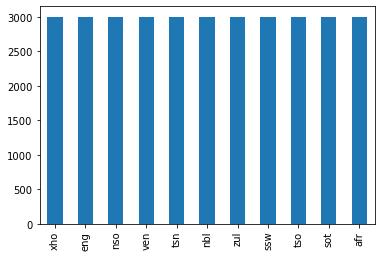

In [121]:
#
df_train.lang_id.value_counts().sort_values(ascending = False).plot(kind = 'bar')

In the above Bar Graph, the data seems to be fairly balanced.

#### 3.2 Test Dataset

Let us check for null or missing values and basic info of the test dataset.

In [122]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [123]:
#Checking for NULL values

df_test.isnull().sum()

index    0
text     0
dtype: int64

We are now going to change upper cases into lower case from the test dataset

In [124]:
df_test['text'] = df_test['text'].str.lower()

In [125]:
df_test['text'] = df_test['text'].apply(remove_punctuation)
df_test

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta
...,...,...
5677,5678,you mark your ballot in private
5678,5679,ge o ka kgetha ka bowena go se šomiše mofani k...
5679,5680,e ka kopo etsa kgetho ya hao ka hloko hobane h...
5680,5681,tb ke bokudi ba pmb mme morero o tla lefella t...


### 4. Data Processing

In [132]:
tokeniser = TreebankWordTokenizer()
df_train['tokens'] = df_train['text'].apply(tokeniser.tokenize)

In [133]:
df_train

,lang_id,text,tokens
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulunatal department of tra...,"[the, province, of, kwazulunatal, department, ..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."
...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,"[popo, ya, dipolateforomo, tse, ke, go, tlisa,..."
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,"[modise, mosadi, na, o, ntse, o, sa, utlwe, ho..."
32997,eng,closing date for the submission of completed t...,"[closing, date, for, the, submission, of, comp..."
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,"[nawuphina, umntu, ofunyenwe, enetyala, phants..."


In [134]:
# labels
y = df_train['lang_id']

# features
X = df_train.drop('lang_id', axis=1)

In [135]:
cv = CountVectorizer()

In [139]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [137]:
X_traincv =  cv.fit_transform(X_train)

In [140]:
a=X_traincv.toarray()

In [141]:
a

array([[1, 0],
       [0, 1]], dtype=int64)

### 5. Modelling

,text,tokens
21177,dikhompi tša kgale tšeo di bego di hlamilwe go...,"[dikhompi, tša, kgale, tšeo, di, bego, di, hla..."
23394,motshwayi a hlokomele hore ha mohlahlobuwa a n...,"[motshwayi, a, hlokomele, hore, ha, mohlahlobu..."
17972,nanyana ngimuphi umuntu oqabela omunye ngabomu...,"[nanyana, ngimuphi, umuntu, oqabela, omunye, n..."
29139,isikolo semfundo ephakamileyo somthetho singan...,"[isikolo, semfundo, ephakamileyo, somthetho, s..."
19820,munhu unwana ni unwana loyi timfanelo ta yena ...,"[munhu, unwana, ni, unwana, loyi, timfanelo, t..."
...,...,...
32469,the iphulo lelrad liphulwana lenkqubo yokwabiw...,"[the, iphulo, lelrad, liphulwana, lenkqubo, yo..."
16317,ukwenza okwenziwa ngokugunyazwa okwenziwa ngok...,"[ukwenza, okwenziwa, ngokugunyazwa, okwenziwa,..."
12895,r million in r million in and r million in to ...,"[r, million, in, r, million, in, and, r, milli..."
6012,sekai sa bo ditherisano le dikgwebisano tsotlh...,"[sekai, sa, bo, ditherisano, le, dikgwebisano,..."


In [42]:
# Instantiate regression tree model



NameError: name 'X_train' is not defined

### 6. Model Analysis